#### Import required libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the csv file as pandas DataFrame

In [2]:
df = pd.read_csv("ford.csv")

##### Read the fisrt and last 5 rows of the dataset for a quick overview

In [3]:
display(df.head ())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


In [4]:
display(df.tail ())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


#### Check for any missing values, data types of the columns

Here, total number of observations is 17964 and have 8 features. There is no missing values.

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
model           17964 non-null object
year            17964 non-null int64
price           17964 non-null int64
transmission    17964 non-null object
mileage         17964 non-null int64
fuelType        17964 non-null object
mpg             17964 non-null float64
engineSize      17964 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


None

#### Count the number of unique values present in the 'year' column

In [6]:
print (df["year"].unique())

print (len(df["year"].unique()))

print (df["year"].value_counts())

print (type(df["year"].value_counts()))

[2017 2018 2019 2015 2014 2016 2013 2020 2012 2008 2010 2009 2011 1998
 2007 2005 2006 2002 2003 1996 2004 2000]
22
2017    4888
2018    4014
2019    3194
2016    2331
2015    1367
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2003       3
2002       3
1996       1
1998       1
2000       1
Name: year, dtype: int64
<class 'pandas.core.series.Series'>


#### Count the number of unique values present in the 'model' column

In [7]:
#number of cars by model
print (df["model"].value_counts())

#unique car model names
print (df["model"].unique())

#number of unique models
print (len(df["model"].unique()))

 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64
[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit To

#### Count the number of unique values present in the 'transmission' column

In [8]:
print (df['transmission'].value_counts())
print (type(df['transmission'].value_counts()))

Manual       15517
Automatic     1360
Semi-Auto     1087
Name: transmission, dtype: int64
<class 'pandas.core.series.Series'>


#### Count the number of unique values present in the 'fuelType' column

In [9]:
print (df['fuelType'].value_counts())

print (type(df['fuelType'].value_counts()))

#converting series to DataFrame
df_fuelType = pd.DataFrame (df['fuelType'].value_counts())

display (df_fuelType.head())
print (type (df_fuelType))
print(df_fuelType.index)

Petrol      12177
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64
<class 'pandas.core.series.Series'>


,fuelType
Petrol,12177
Diesel,5762
Hybrid,22
Electric,2
Other,1


<class 'pandas.core.frame.DataFrame'>
Index(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype='object')


In [10]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
#reseting the index
df_fuelType = df_fuelType.reset_index()

#replacing 'index' with 'fuelType' , 'fuelType' with 'no_of_cars'
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

print (type (df_fuelType))

print(df_fuelType.shape[0])
print (df.shape[0])

#calculating "% of cars", "no_of_cars" is divided by total number of cars i.e. df.shape[0]
df_fuelType ["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

#'% of cars' is rounded to 1 decimal place
df_fuelType = df_fuelType.round (1)

display (df_fuelType)

<class 'pandas.core.frame.DataFrame'>
5
17964


,fuelType,no_of_cars,% of cars
0,Petrol,12177,67.8
1,Diesel,5762,32.1
2,Hybrid,22,0.1
3,Electric,2,0.0
4,Other,1,0.0


#### Create a barplot  

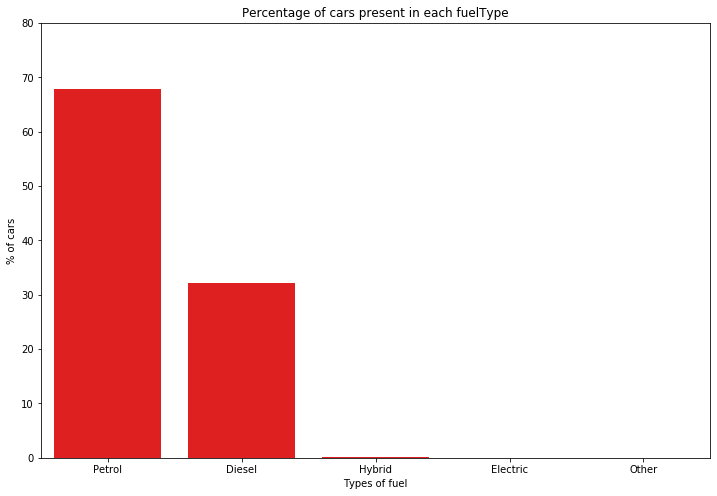

In [11]:
#Barplot using Seaborn libray
plt.figure (figsize = (12,8))
sns.barplot (x ="fuelType", y ="% of cars", data = df_fuelType, color ="red")

plt.xlabel ("Types of fuel")
plt.ylabel ("% of cars")
plt.title ("Percentage of cars present in each fuelType")

plt.yticks(np.arange(0,81,10))

sns.set_context("talk")

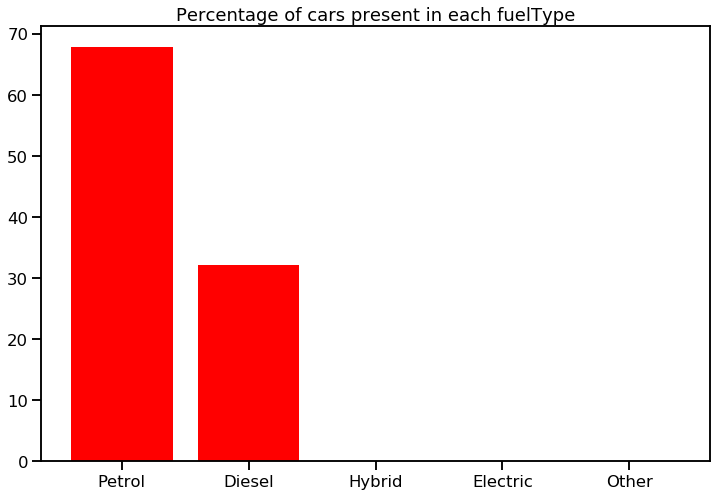

In [12]:
#Barplot using Matplotlib libray
plt.figure (figsize = (12,8))
plt.bar (x ="fuelType", height ="% of cars", data = df_fuelType, color ="red")
plt.title ("Percentage of cars present in each fuelType")
plt.show()

#### Pie Chart for 'transmission'

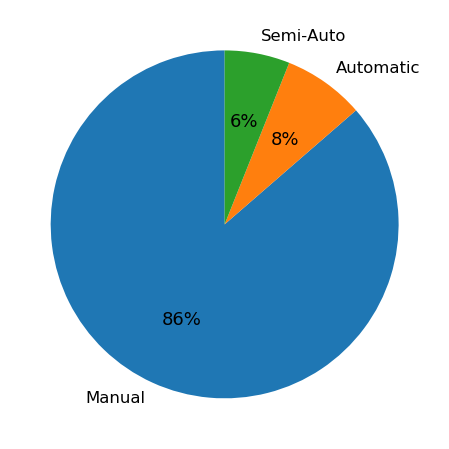

In [13]:
df ['transmission'].value_counts().plot(kind = "pie", autopct = "%1.0f%%", startangle = 90, figsize = (10,8))

plt.ylabel ("")
plt.show ()
sns.set_context("poster")

#### Find the percentage of unique values present in the 'transmission' column

In [14]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())
#reseting the index
df_transmission = df_transmission.reset_index()

#replacing 'index' with 'transmission' , 'transmission' with 'no_of_cars'
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"no_of_cars"})

print(df_transmission.shape[0])
print (df.shape[0])

#calculating "% of cars", "no_of_cars" is divided by total number of cars i.e. df.shape[0]
df_transmission ["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])*100

#'% of cars' is rounded to 1 decimal place
df_transmission = df_transmission.round (1)

display (df_transmission)

3
17964


,transmission,no_of_cars,% of cars
0,Manual,15517,86.4
1,Automatic,1360,7.6
2,Semi-Auto,1087,6.1


#### Barplot for the 'transmission' column

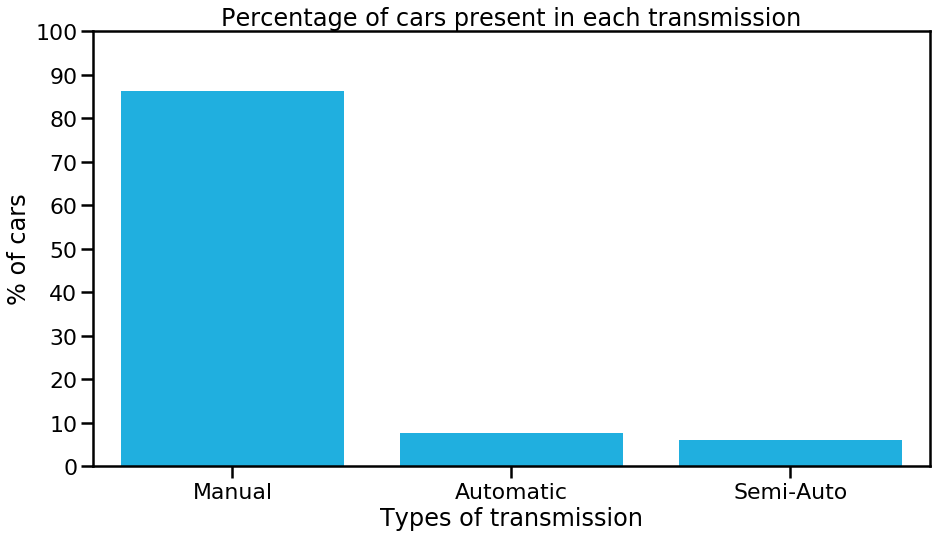

In [15]:
plt.figure (figsize = (15,8))
sns.barplot (x = "transmission", y = "% of cars", data = df_transmission, color = "deepskyblue")

plt.xlabel ("Types of transmission")
plt.ylabel ("% of cars")
plt.title ("Percentage of cars present in each transmission")

plt.yticks (np.arange (0, 101, 10))

plt.show()

In [16]:
display (df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


In [17]:
df_mileage = pd.DataFrame (df["mileage"].value_counts())

#display (df_mileage)
print (df_mileage.max())

mileage    40
dtype: int64


#### Relationship between the numerical variables by **Scatterplot**

- price vs mileage
- price vs mpg

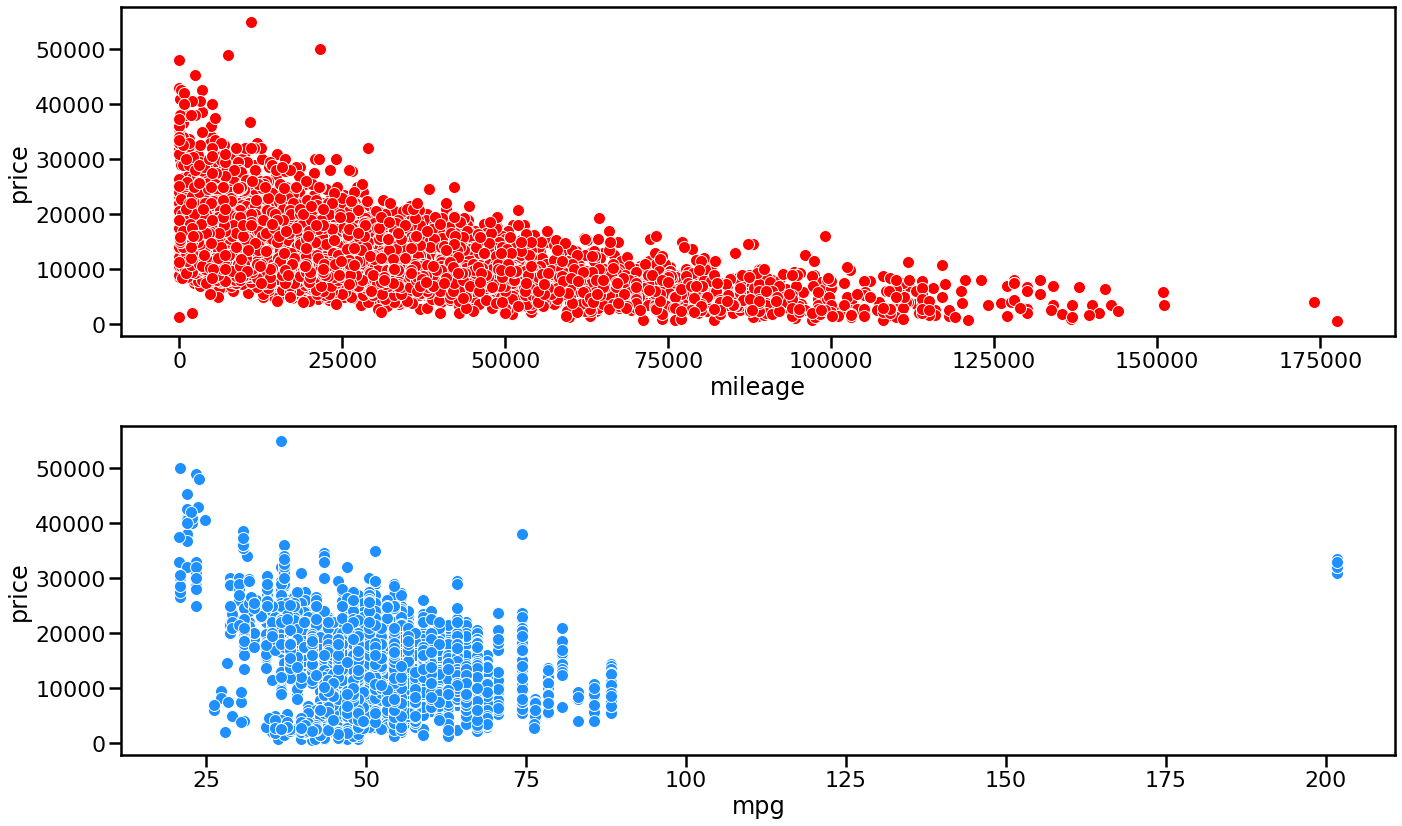

In [18]:
plt.figure (figsize = (20, 12))

#price vs mileage
plt.subplot (2,1,1)
sns.scatterplot (x = "mileage", y = "price", data = df, color = "r")

#price vs mpg
plt.subplot (2,1,2)
sns.scatterplot (x = "mpg", y = "price", data = df, color = "dodgerblue")

plt.tight_layout()
plt.show()

#### Changing the hue parameter

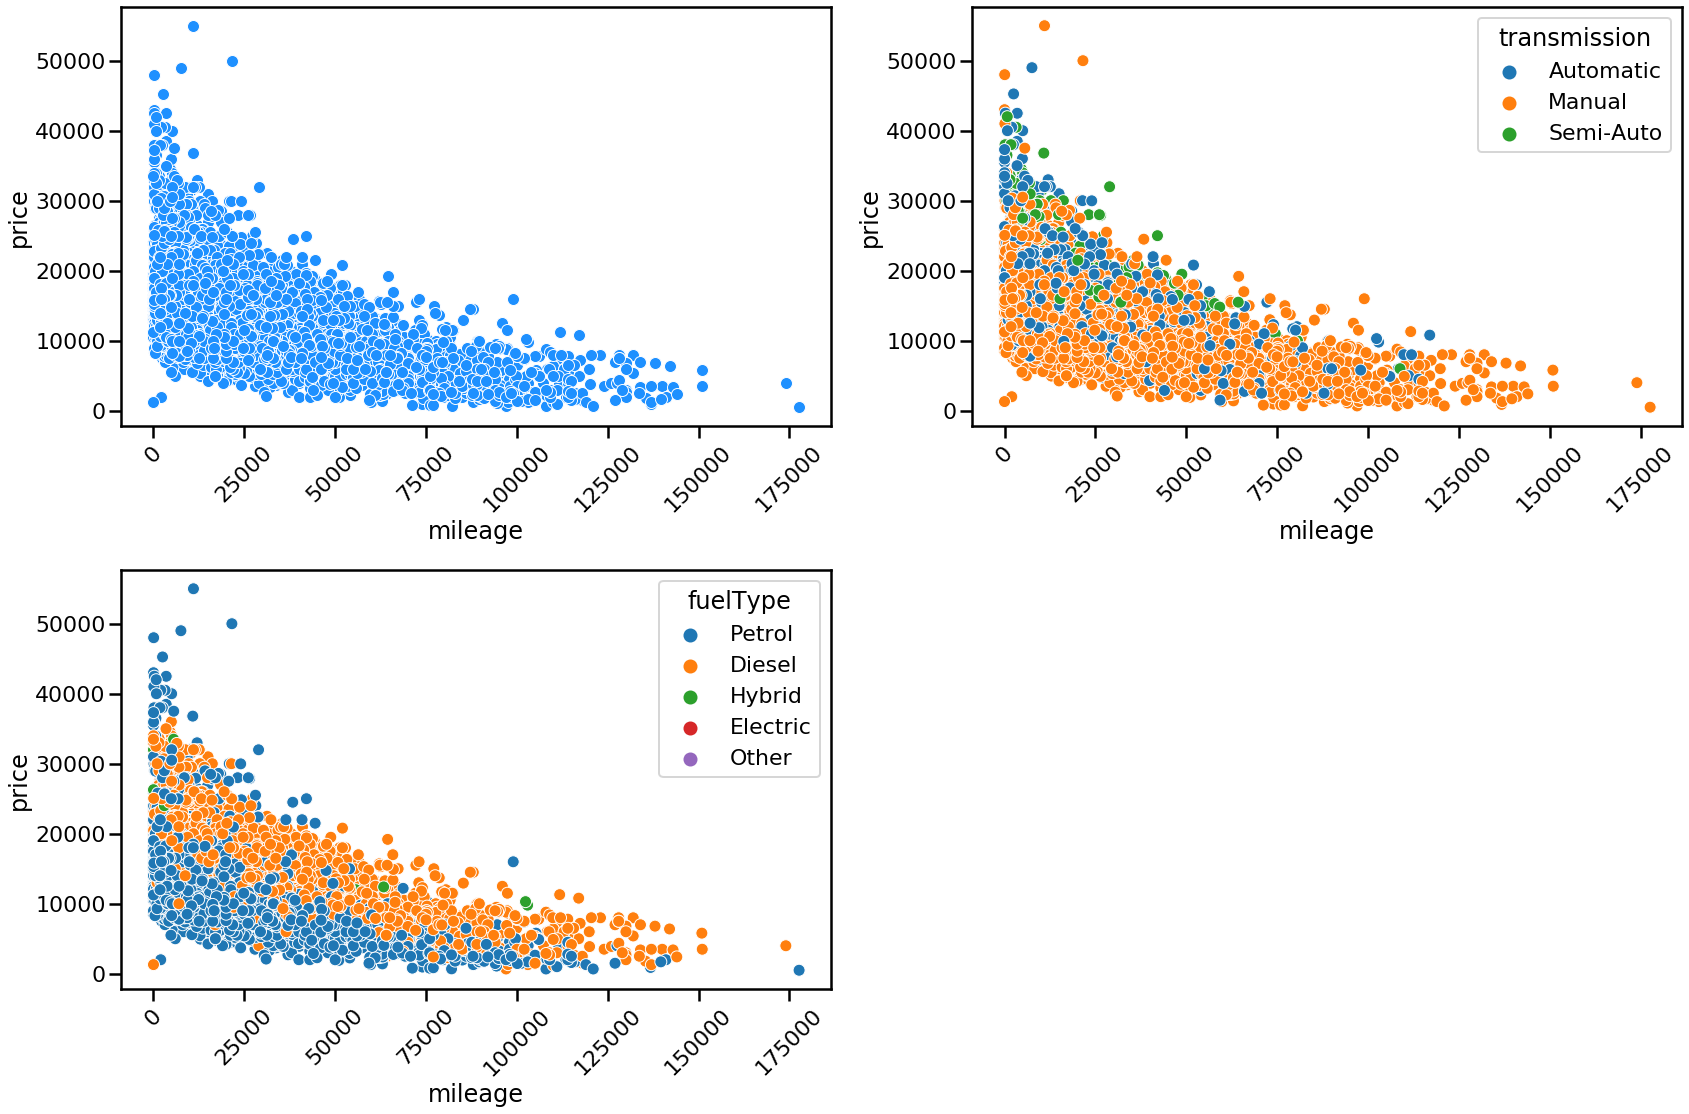

In [19]:
plt.figure (figsize =(24,16))

#price vs mileage
plt.subplot (2,2,1)
sns.scatterplot (x = "mileage", y = "price", data = df, color = "dodgerblue")
plt.xticks (rotation = 45)

# adding a categorical feature: 'transmission'
plt.subplot(2,2,2)
sns.scatterplot (x='mileage', y='price', data= df, hue ='transmission')
plt.xticks (rotation = 45)

# adding a categorical feature: 'fuelType'
plt.subplot(2,2,3)
sns.scatterplot (x='mileage', y='price', data= df, hue ='fuelType')
plt.xticks (rotation = 45)

plt.tight_layout()
plt.show()

#### Regression Analysis; trend line

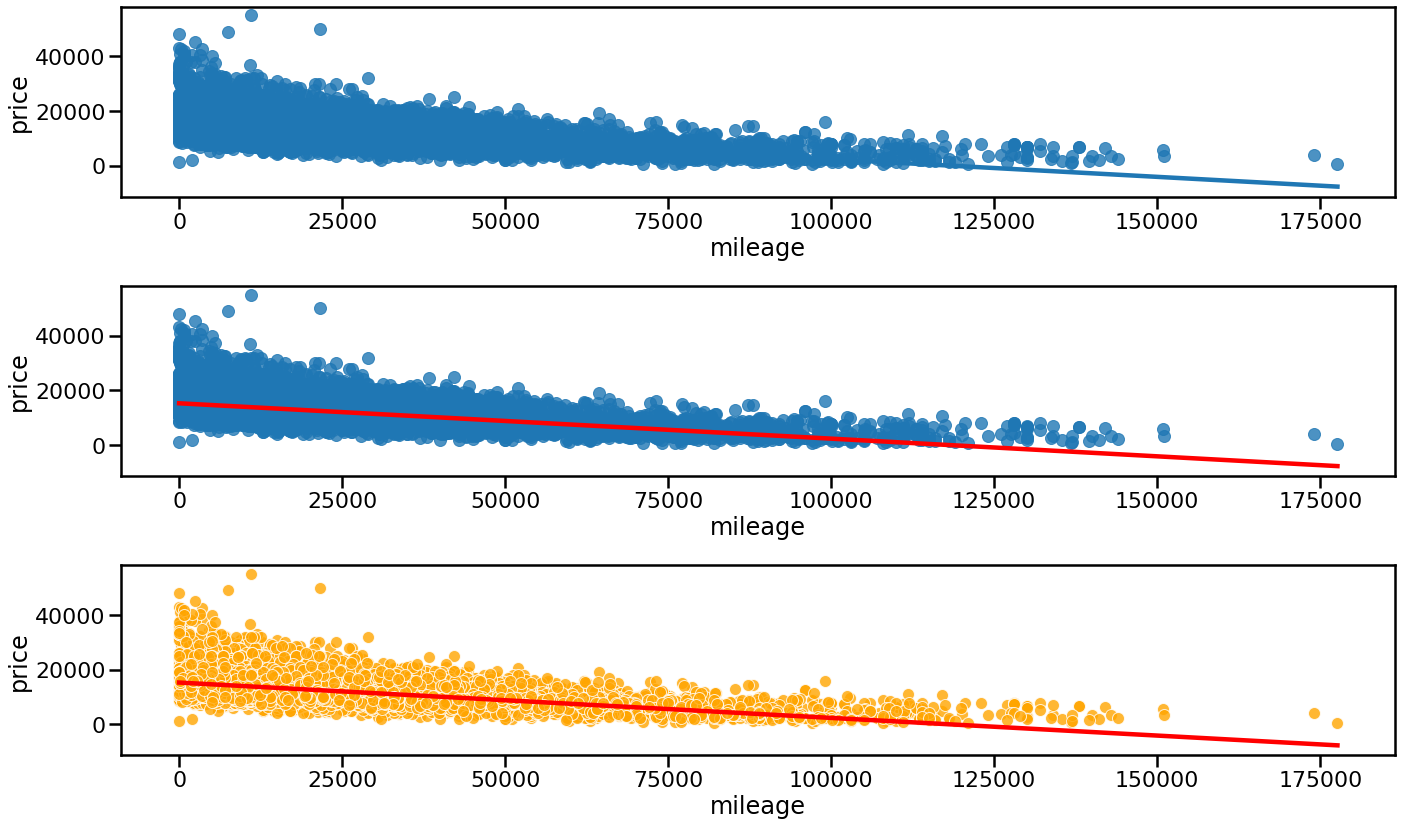

In [20]:
plt.figure (figsize= (20,12))

plt.subplot (3,1,1)
sns.regplot (x = "mileage", y = "price", data = df)

# changing the color of the trend line
plt.subplot (3,1,2)
sns.regplot (x = "mileage", y = "price", data = df, line_kws = {'color': 'r'})

# changing the color of the scatter plot
plt.subplot (3,1,3)
sns.regplot (x = "mileage", y = "price", data = df, line_kws = {'color': 'r'}, 
             scatter_kws = {'color':'orange', 'edgecolor':'white'})

plt.tight_layout()
plt.show()

#### Pairplot

Pairplot for all numerical values

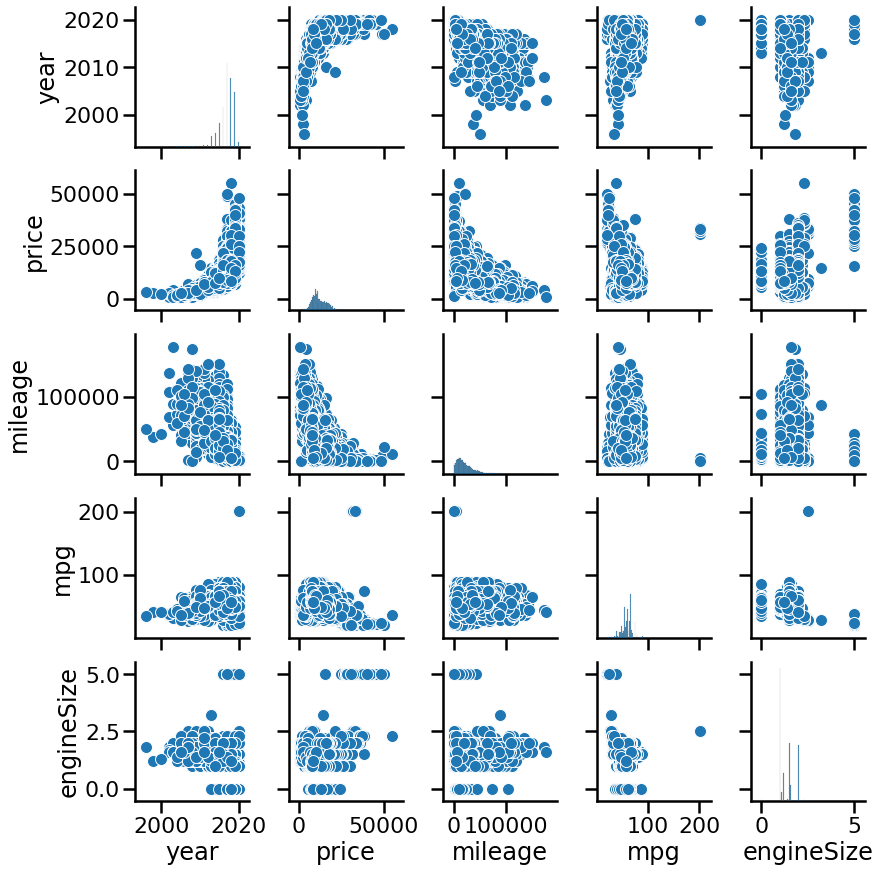

In [21]:
sns.pairplot(df)
plt.show()

#### Pairplot with transmission as a category 

From this pairplot with transmission as a category, it is visible that most of the cars are Manual type.

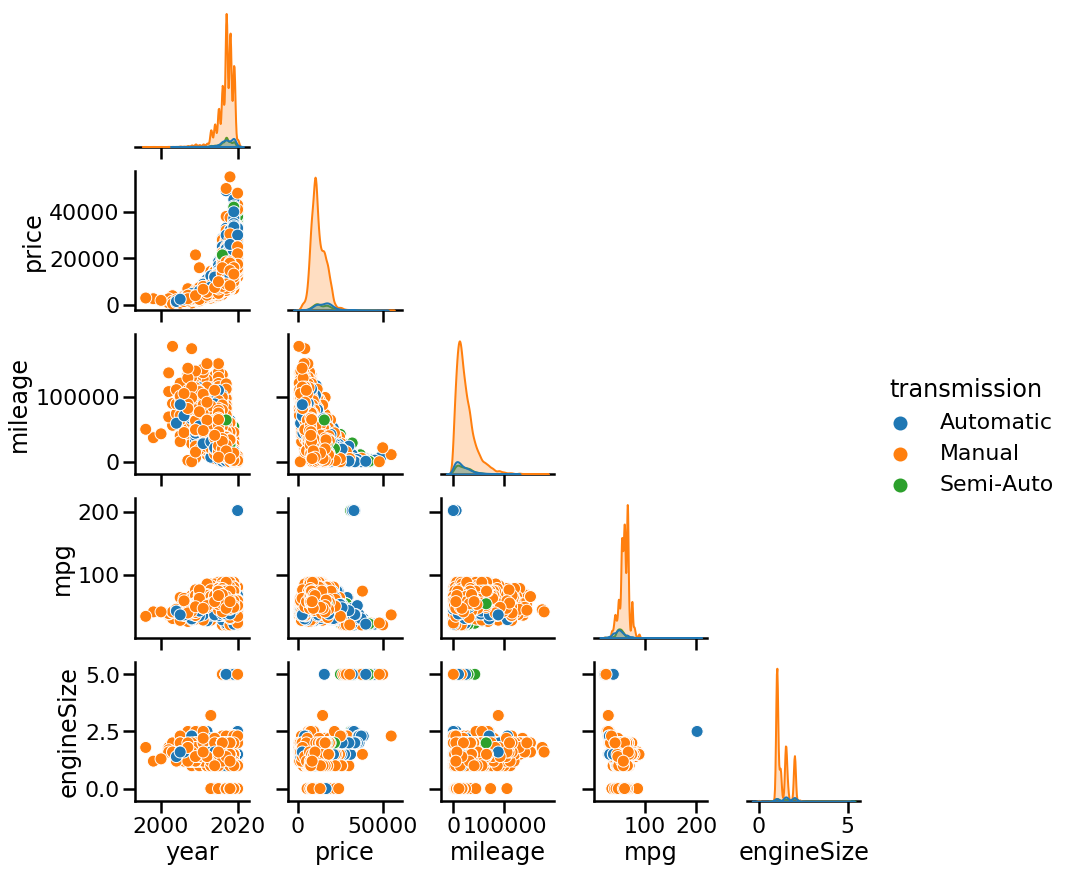

In [22]:
sns.pairplot(df, hue = "transmission", corner = True)

plt.show()

### Histogram by using Seaborn

In [23]:
display (df.head())
print (df.info())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
model           17964 non-null object
year            17964 non-null int64
price           17964 non-null int64
transmission    17964 non-null object
mileage         17964 non-null int64
fuelType        17964 non-null object
mpg             17964 non-null float64
engineSize      17964 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB
None


In [24]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

display(df.describe())

,year,price,mileage,mpg,engineSize
count,17964.00,17964.00,17964.00,17964.00,17964.00
mean,2016.86,12280.08,23361.88,57.91,1.35
std,2.02,4741.32,19471.24,10.13,0.43
min,1996.00,495.00,1.00,20.80,0.00
25%,2016.00,8999.00,9987.00,52.30,1.00
50%,2017.00,11291.00,18242.50,58.90,1.20
75%,2018.00,15299.00,31052.00,65.70,1.50
max,2020.00,54995.00,177644.00,201.80,5.00


In [25]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df["mileage"].describe()

count    17964.00
mean     23361.88
std      19471.24
min          1.00
25%       9987.00
50%      18242.50
75%      31052.00
max     177644.00
Name: mileage, dtype: float64

In [26]:
display(df.describe(include=['O']))

,model,transmission,fuelType
count,17964,17964,17964
unique,23,3,5
top,Fiesta,Manual,Petrol
freq,6556,15517,12177


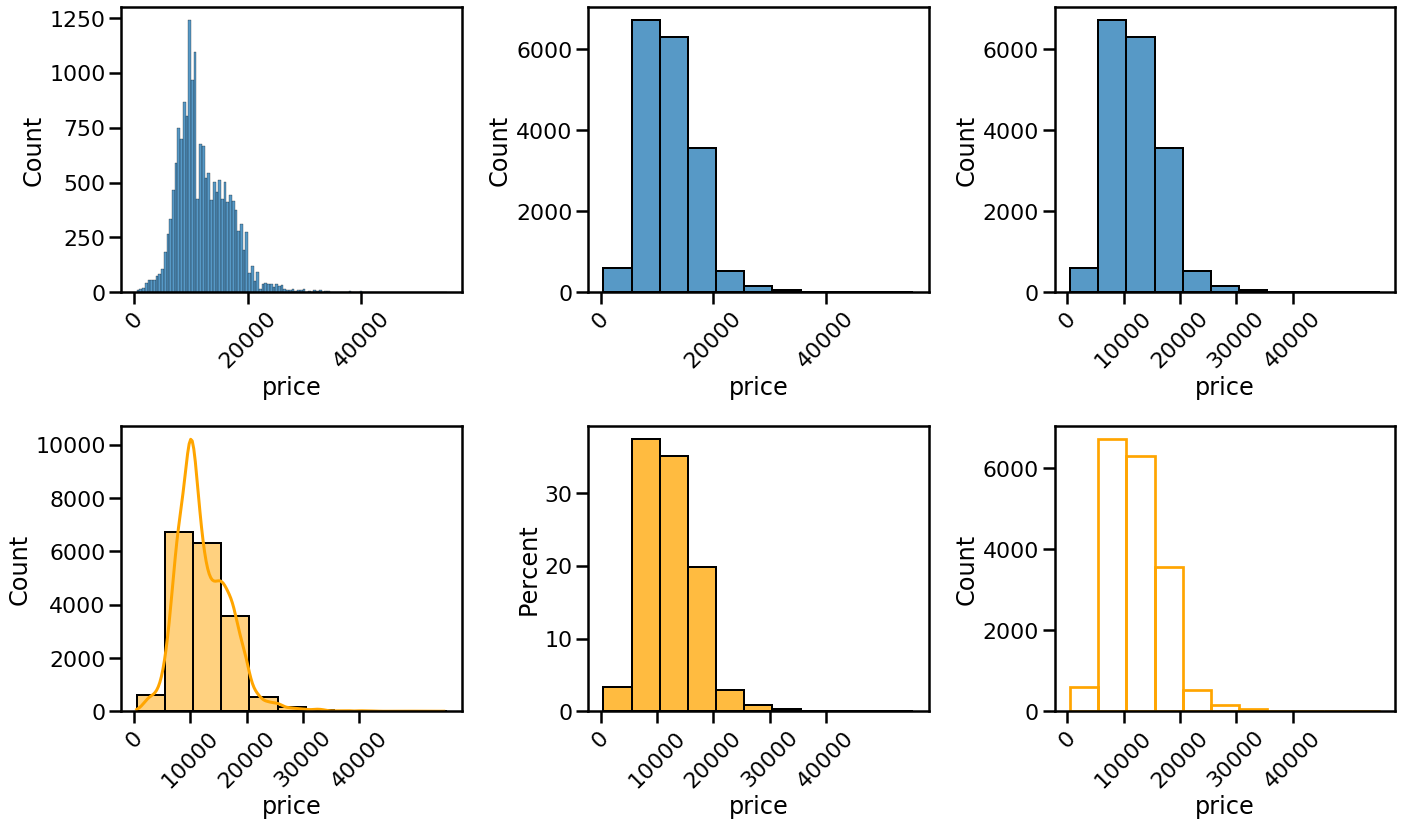

In [27]:
plt.figure (figsize = (20, 12))

#default plot, color
plt.subplot (2,3,1)
sns.histplot (x = "price", data = df)
plt.xticks (rotation = 45)

#binwidth added as 5000
plt.subplot (2,3,2)
sns.histplot (x = "price", data = df, binwidth = 5000)
plt.xticks (rotation = 45)

plt.subplot (2,3,3)
sns.histplot (x = "price", data = df, binwidth = 5000)
plt.xticks (np.arange(0, 40001, 10000) ,rotation = 45)

#orange color, kde added 
plt.subplot (2,3,4)
sns.histplot (x = "price", data = df, binwidth = 5000, kde = True, color = "orange")
plt.xticks (np.arange(0, 40001, 10000) ,rotation = 45)

#percent added y-axis instead of count in numbers, kde removed
plt.subplot (2,3,5)
sns.histplot (x = "price", data = df, binwidth = 5000, color = "orange", stat = 'percent')
plt.xticks (np.arange(0, 40001, 10000) ,rotation = 45)

#Fill empty
plt.subplot (2,3,6)
sns.histplot (x = "price", data = df, binwidth = 5000, color = "orange", fill = False )
plt.xticks (np.arange(0, 40001, 10000) ,rotation = 45)

plt.tight_layout()
plt.show()

### Boxplot & Violinplot by using Seaborn

#### Create a boxplot for "price" of the ford used cars

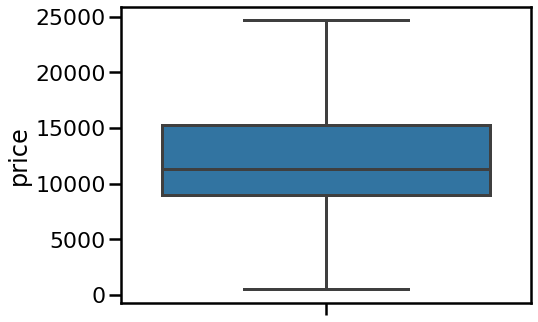

In [28]:
plt.figure (figsize = (8,5))

sns.boxplot (y = "price", data = df, showfliers = False ) #here outliers are not taken

plt.tight_layout()
plt.show()

In [29]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

In [30]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
model           17964 non-null object
year            17964 non-null int64
price           17964 non-null int64
transmission    17964 non-null object
mileage         17964 non-null int64
fuelType        17964 non-null object
mpg             17964 non-null float64
engineSize      17964 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB
None


In [31]:
num_cols = ["year", "price", "mileage", "mpg", "engineSize"] #this is the manual way of adding numerical columns in a list

#### Separate the numerical columns by using for loops

In [32]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append (col)
        #print (num_cols)

print (num_cols)

['year', 'price', 'mileage', 'mpg', 'engineSize']


#### Create a loop to show the boxplots of all numeric columns

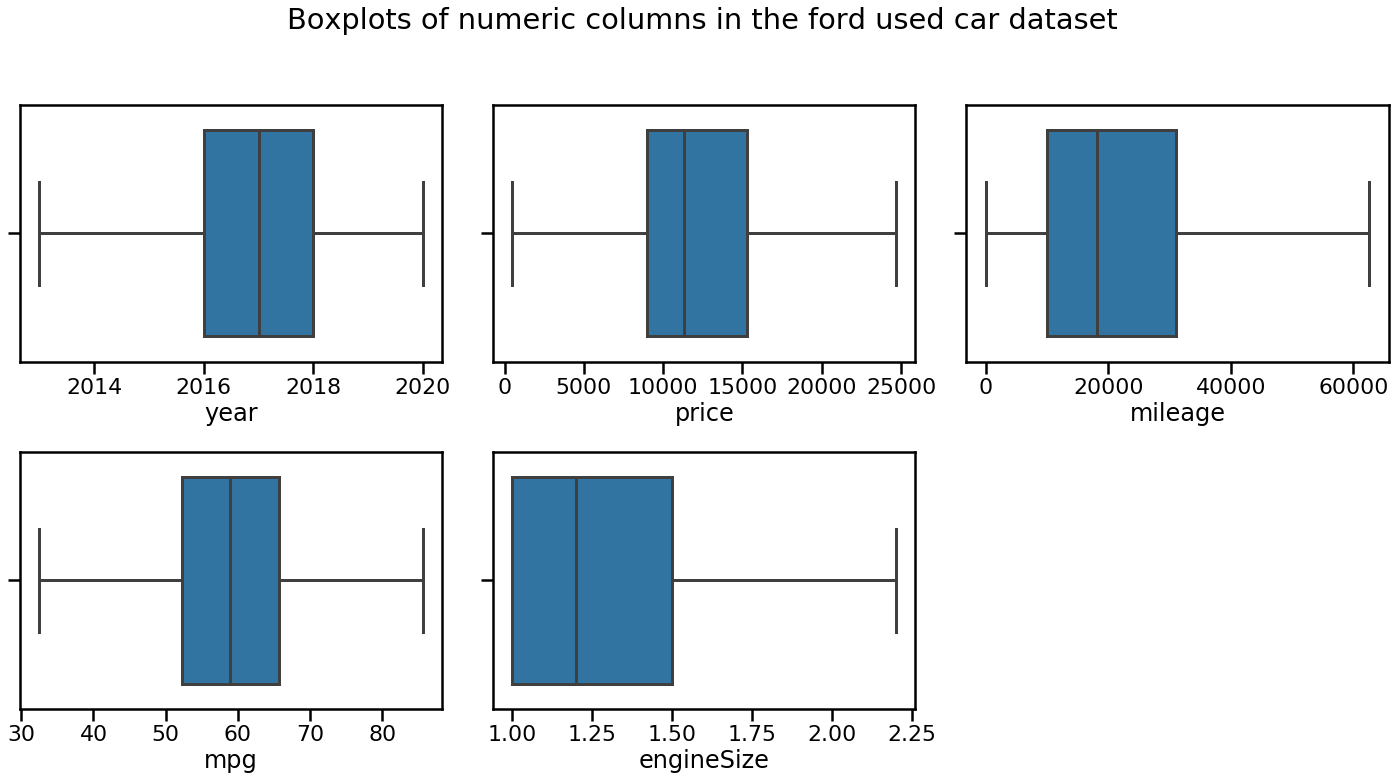

In [33]:
plt.figure (figsize = (20,10)) #in figsize width, height

for index in range (len(num_cols)):
    #print ("index = ", index, "position = ", index+1, "column name = ", num_cols[index])
    
    plt.subplot (2,3,index+1) #row, column, position
    sns.boxplot (x = num_cols[index], data =df, showfliers = False )

plt.suptitle ("Boxplots of numeric columns in the ford used car dataset", y = 1.1)
plt.tight_layout()
plt.show()

In [34]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

display(df.describe())

,year,price,mileage,mpg,engineSize
count,17964.00,17964.00,17964.00,17964.00,17964.00
mean,2016.86,12280.08,23361.88,57.91,1.35
std,2.02,4741.32,19471.24,10.13,0.43
min,1996.00,495.00,1.00,20.80,0.00
25%,2016.00,8999.00,9987.00,52.30,1.00
50%,2017.00,11291.00,18242.50,58.90,1.20
75%,2018.00,15299.00,31052.00,65.70,1.50
max,2020.00,54995.00,177644.00,201.80,5.00


#### Observations from the boxplots (without outliers)

- **year**
    - half (50%) of the cars are between year 2016 and 2018
    - the oldest car is 1996 and newest 2020
    - 25% of the cars are older than 2016
    - 25% of the cars are later than 2018
- **price**
    - highest value of the car is about 25,000 usd (not considering outliers)
    - 50% of the cars price are between 8,000 - 15,000 usd
    - average value of the car is about 12,000 usd
    - 25% of the cars has higher price 15,000 usd
- **mileage**
    - 50% of the cars have mileage between 10,000 to 30,000 miles
    - average mileage is about 18,000 miles
    - 25% of the cars has more than 30,000 miles mileage
- **mpg**
    - 50% of the cars mpg is between 52 to 65.
    - average mpg is 59 mpg.
    - 25% cars have less tha

#### Adding categorical feature *fuelType* in the boxplot 

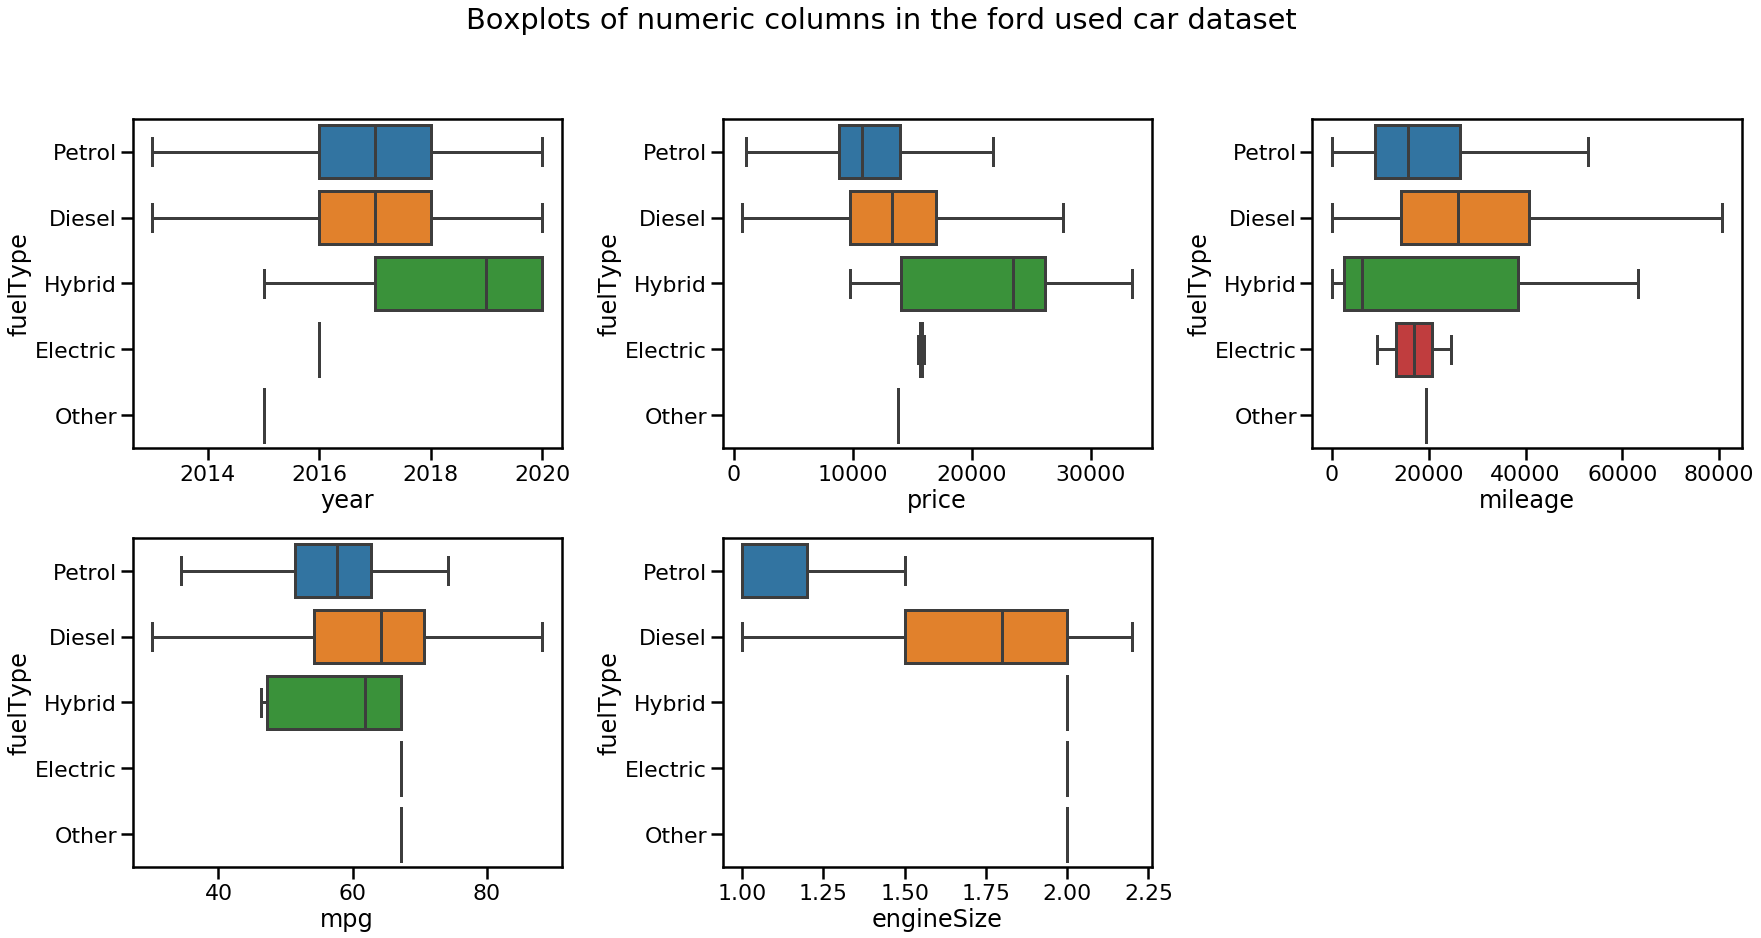

In [35]:
plt.figure (figsize = (25,12)) #in figsize width, height

for index in range (len(num_cols)):
    #print ("index = ", index, "position = ", index+1, "column name = ", num_cols[index])
    
    plt.subplot (2,3,index+1) #row, column, position
    sns.boxplot (x = num_cols[index], data =df, showfliers = False, y = df["fuelType"] )

plt.suptitle ("Boxplots of numeric columns in the ford used car dataset", y = 1.1)
plt.tight_layout()
plt.show()

### Comparing boxplots and violinplot

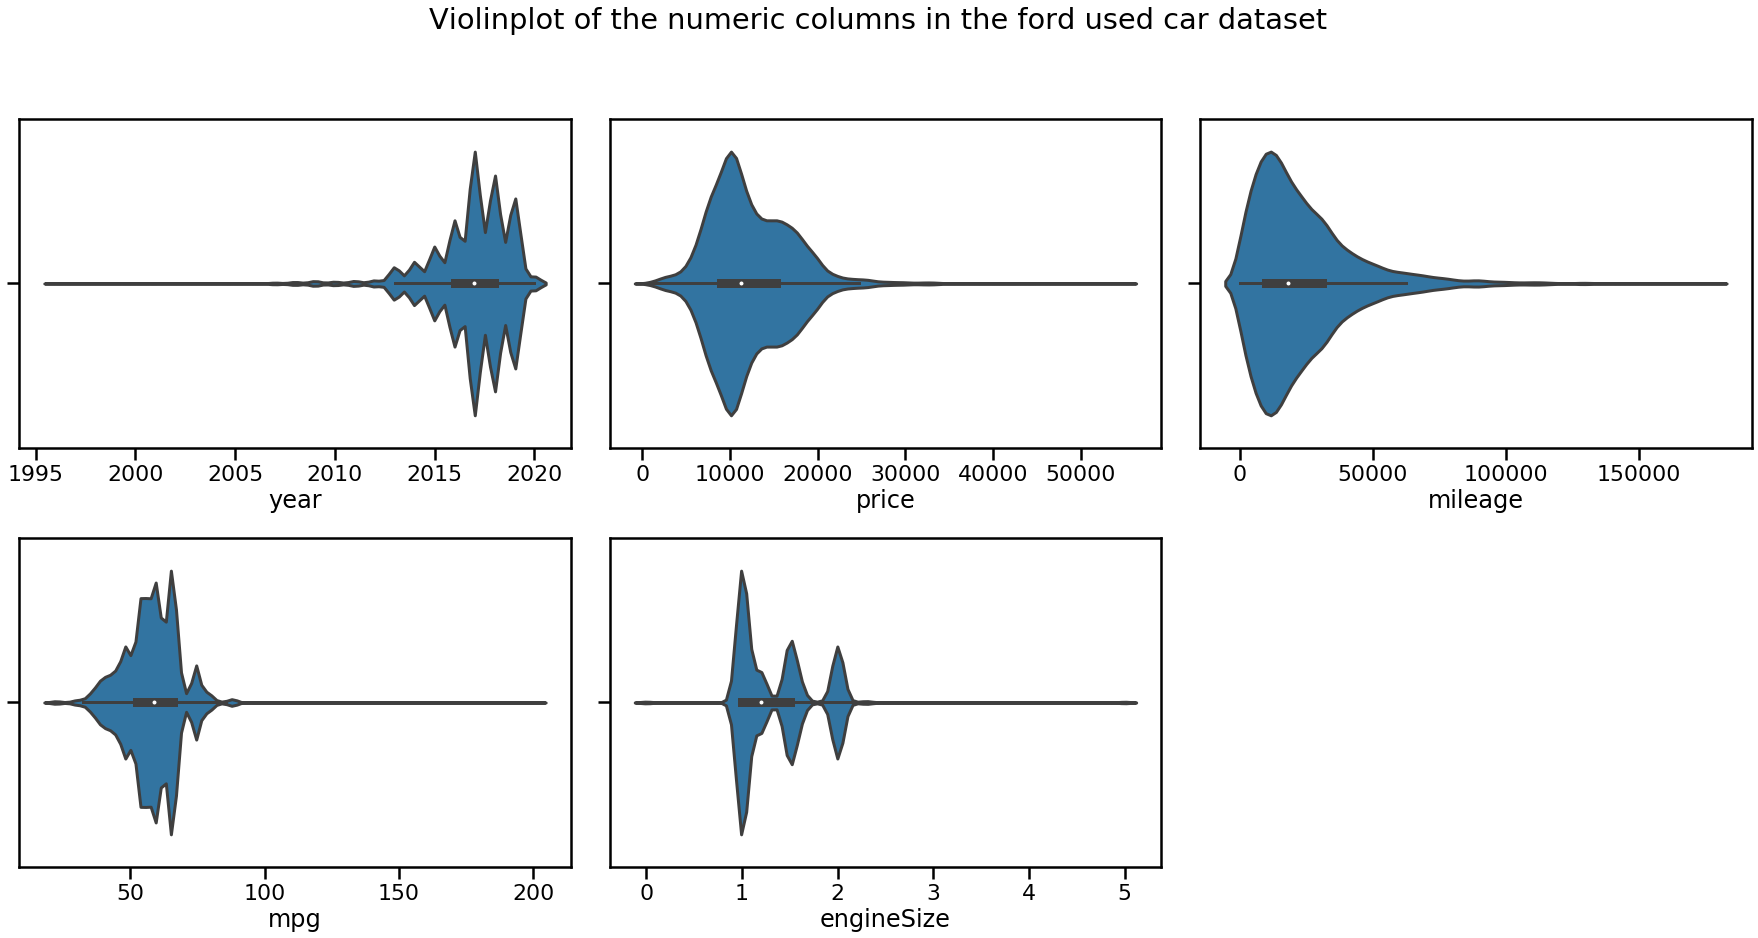

In [36]:
plt.figure(figsize=(25,12))

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Violinplot of the numeric columns in the ford used car dataset", y = 1.1)
plt.tight_layout()
plt.show()

### Correlation and Heat map 

#### Assumptions:

### Car price increases when engineSize increases
- Car price increases when mpg increases
- Car price decreases when the mileage increases
- When the engineSize increases, the mpg decreases
- Car price increases with the latest year cars

In [37]:
correlation_matrix = df.corr()
display(correlation_matrix)

mask = np.zeros_like(correlation_matrix)
mask [np.triu_indices_from(mask)] = True
print (mask)

,year,price,mileage,mpg,engineSize
year,1.00,0.65,-0.72,-0.02,-0.14
price,0.65,1.00,-0.53,-0.35,0.41
mileage,-0.72,-0.53,1.00,0.12,0.22
mpg,-0.02,-0.35,0.12,1.00,-0.26
engineSize,-0.14,0.41,0.22,-0.26,1.00


[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]


### Heat map

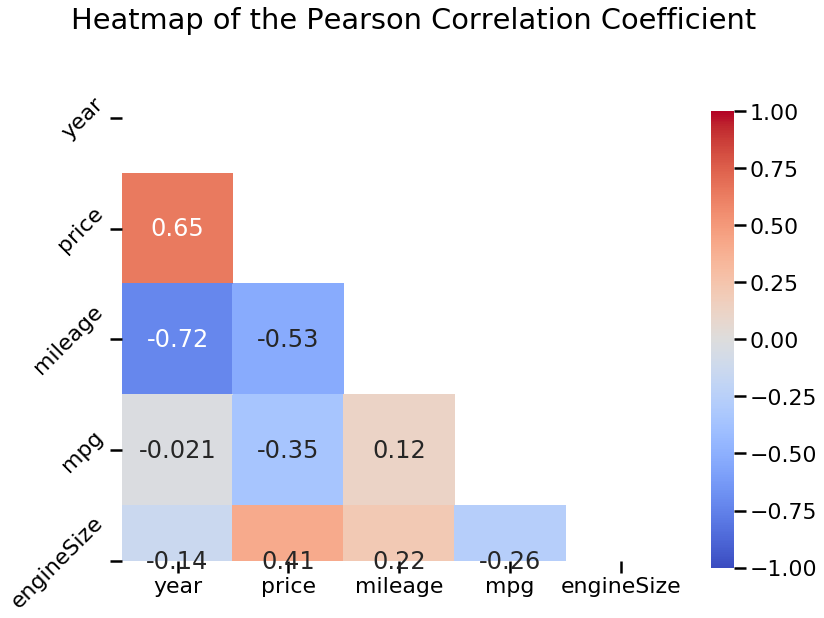

In [43]:
plt.figure (figsize = (12,8))

sns.heatmap (correlation_matrix, square = True, vmax = 1.0, vmin = -1.0, mask = mask, annot = True, cmap = 'coolwarm')
plt.suptitle ("Heatmap of the Pearson Correlation Coefficient", y =1.1)
plt.yticks (rotation = 45)
plt.tight_layout()
plt.show()

#### Observation

- Car price increases when mpg increases: **False** (*Negative relationship*) 
- Car price decreases when the mileage increases: **True**
- When the engineSize increases, the mpg decreases: **True**
- Car price increases with the latest year cars: **True** (*strongly relationship*)